<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_Linear_Discriminant_Analysis_for_Warehouse_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LDA Common Covariance Matrix:
 [[40.09375 14.1875 ]
 [14.1875   9.375  ]]
LDA Class Means:
 [[51.75 29.5 ]
 [55.   29.  ]]
LDA Coefficients (Scaling Matrix):
 [[ 0.16135672 -0.2841865 ]]

LDA Confusion Matrix:
 [[1 0]
 [0 1]]
LDA Accuracy: 100.00%

QDA Covariance Matrices:
Class 0 Covariance Matrix:
 [[23.58333333 12.83333333]
 [12.83333333 13.66666667]]
Class 1 Covariance Matrix:
 [[83.33333333 25.        ]
 [25.         11.33333333]]

QDA Confusion Matrix:
 [[1 0]
 [0 1]]
QDA Accuracy: 100.00%

Naive Bayes Variances:
 [[17.68750004 10.25000004]
 [62.50000004  8.50000004]]

Naive Bayes Confusion Matrix:
 [[1 0]
 [0 1]]
Naive Bayes Accuracy: 100.00%

Summary of Classifier Accuracies:
LDA: 100.00%
QDA: 100.00%
Naive Bayes: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


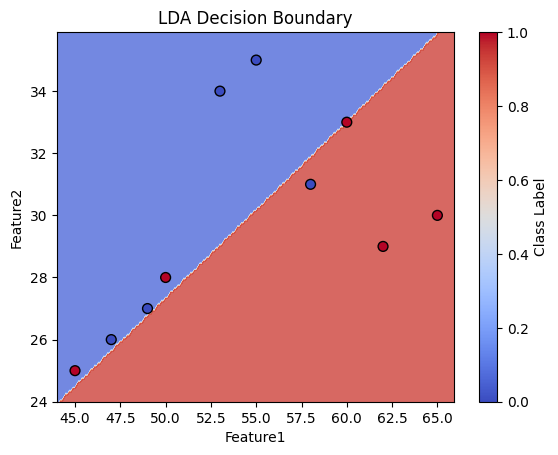

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


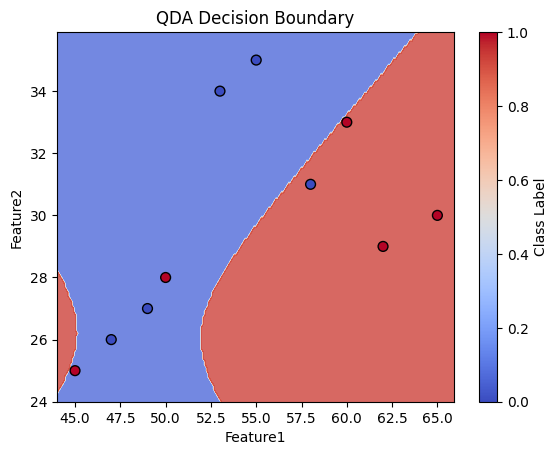

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


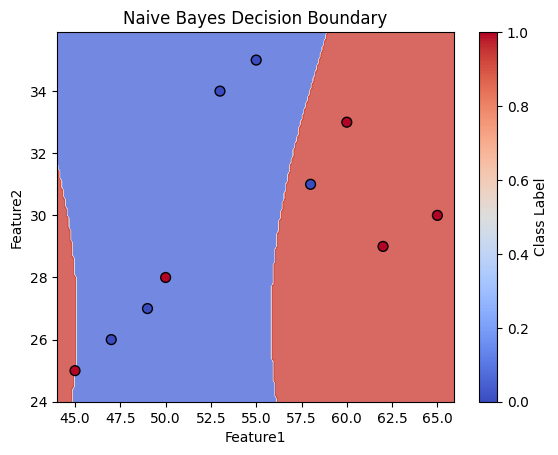

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Step 1: Create a manually defined dataset to simulate shipping outcomes.
# This dataset includes two features and a binary outcome variable that represents whether a shipment is "On Time" (1) or "Late" (0).
data = pd.DataFrame({
    'Feature1': [45, 55, 65, 50, 47, 53, 60, 58, 62, 49],  # Feature1 represents some quantitative measure related to shipments.
    'Feature2': [25, 35, 30, 28, 26, 34, 33, 31, 29, 27],  # Feature2 represents another quantitative measure, possibly complementary to Feature1.
    'Outcome': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]             # Outcome is the target variable I want to predict: 1 = "On Time", 0 = "Late".
})

# Step 2: Splitting the dataset into training and test sets.
# I need to divide the dataset into training and test sets so that I can evaluate how well the models generalize to unseen data.
# An 80-20 split is a common choice because it provides enough data for training while leaving sufficient data for testing.
X = data[['Feature1', 'Feature2']]  # X contains the features used for prediction.
y = data['Outcome']  # y is the target variable I want to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Using a fixed random state for reproducibility.

# Step 3: Initialize and fit the Linear Discriminant Analysis (LDA) model.
# I want to use LDA because it assumes equal covariance among classes, making it a good starting point for this classification problem.
# By enabling the store_covariance parameter, I can inspect the learned covariance matrix later, which helps me understand the model.
lda = LinearDiscriminantAnalysis(store_covariance=True)  # Initialize the LDA model.
lda.fit(X_train, y_train)  # Fit the LDA model to the training data.

# Checking LDA parameters.
# After fitting the model, I can examine the common covariance matrix, the mean of each class, and the scaling matrix.
# These outputs help me understand what the model learned and how it separates the classes.
print("LDA Common Covariance Matrix:\n", lda.covariance_)
print("LDA Class Means:\n", lda.means_)
print("LDA Coefficients (Scaling Matrix):\n", lda.coef_)

# Step 4: Making predictions and evaluating LDA.
# Now that the model is trained, I use it to predict the outcomes on the test set.
# I use a confusion matrix to compare the predicted labels with the actual labels and calculate the accuracy to measure performance.
y_pred_lda = lda.predict(X_test)  # Generate predictions for the test set.
lda_conf_matrix = confusion_matrix(y_test, y_pred_lda)  # Create a confusion matrix.
lda_accuracy = accuracy_score(y_test, y_pred_lda)  # Calculate the accuracy of the model.

# Printing results for LDA.
# I like to see the confusion matrix and the accuracy score because they give me a clear picture of how well the model is performing.
print("\nLDA Confusion Matrix:\n", lda_conf_matrix)
print("LDA Accuracy: {:.2f}%".format(lda_accuracy * 100))

# Step 5: Initialize and fit the Quadratic Discriminant Analysis (QDA) model.
# I want to explore QDA because it uses class-specific covariance matrices, which allows for more flexibility when class distributions have different variances.
qda = QuadraticDiscriminantAnalysis(store_covariance=True)  # Initialize the QDA model.
qda.fit(X_train, y_train)  # Fit the QDA model to the training data.

# Checking QDA-specific parameters.
# For QDA, I can inspect the covariance matrix for each class. This helps me understand the differences in variance between the "On Time" and "Late" shipments.
print("\nQDA Covariance Matrices:")
for i, cov in enumerate(qda.covariance_):
    print(f"Class {i} Covariance Matrix:\n", cov)

# Step 6: Making predictions and evaluating QDA.
# After training the QDA model, I evaluate its performance on the test set.
# Like with LDA, I use a confusion matrix and accuracy score to assess how well QDA classifies the shipments.
y_pred_qda = qda.predict(X_test)  # Generate predictions for the test set.
qda_conf_matrix = confusion_matrix(y_test, y_pred_qda)  # Create a confusion matrix.
qda_accuracy = accuracy_score(y_test, y_pred_qda)  # Calculate the accuracy of the model.

# Printing results for QDA.
# I like comparing the results of QDA to LDA to see which method works better for this dataset.
print("\nQDA Confusion Matrix:\n", qda_conf_matrix)
print("QDA Accuracy: {:.2f}%".format(qda_accuracy * 100))

# Step 7: Initialize and fit the Naive Bayes (GaussianNB) model.
# I want to try Naive Bayes because it assumes diagonal covariance matrices, which simplifies the model compared to QDA.
# This can be useful if I suspect that the features are conditionally independent within each class.
nb = GaussianNB()  # Initialize the Naive Bayes model.
nb.fit(X_train, y_train)  # Fit the Naive Bayes model to the training data.

# Checking variances for each class.
# The Naive Bayes model stores the variance of each feature within each class instead of the full covariance matrix.
# This assumption reduces the complexity of the model and the amount of data it needs to store.
print("\nNaive Bayes Variances:\n", nb.var_)

# Step 8: Making predictions and evaluating Naive Bayes.
# I evaluate the performance of Naive Bayes in the same way as LDA and QDA, using a confusion matrix and accuracy score.
y_pred_nb = nb.predict(X_test)  # Generate predictions for the test set.
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)  # Create a confusion matrix.
nb_accuracy = accuracy_score(y_test, y_pred_nb)  # Calculate the accuracy of the model.

# Printing results for Naive Bayes.
# I like seeing how Naive Bayes compares to LDA and QDA, especially since it makes different assumptions about the data.
print("\nNaive Bayes Confusion Matrix:\n", nb_conf_matrix)
print("Naive Bayes Accuracy: {:.2f}%".format(nb_accuracy * 100))

# Summary of Results:
# Finally, I summarize the accuracy scores of all three classifiers.
# This helps me compare their performance side by side and decide which model is the best for this dataset.
print("\nSummary of Classifier Accuracies:")
print(f"LDA: {lda_accuracy * 100:.2f}%")
print(f"QDA: {qda_accuracy * 100:.2f}%")
print(f"Naive Bayes: {nb_accuracy * 100:.2f}%")

# Step 9: Visualizing decision boundaries.
# I want to visualize how the classifiers separate the data by plotting decision boundaries.
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid for plotting.
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class for each point in the grid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary.
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Using a more visually appealing colormap.
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=50, cmap='coolwarm')
    plt.colorbar(scatter, label='Class Label')  # Adding a colorbar for clarity.
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()

# Plot decision boundaries for each model.
plot_decision_boundary(lda, X, y, "LDA Decision Boundary")
plot_decision_boundary(qda, X, y, "QDA Decision Boundary")
plot_decision_boundary(nb, X, y, "Naive Bayes Decision Boundary")
